In [4]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [6]:
# Cargar el dataset
data = pd.read_csv('winequality-red.csv')

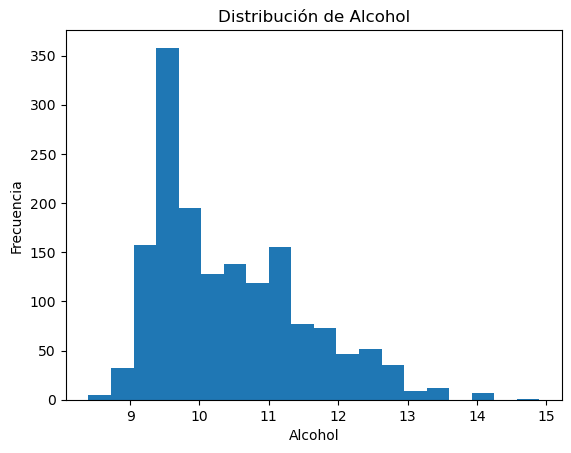

In [8]:
# Histograma de la variable 'alcohol'
plt.hist(data['alcohol'], bins=20)
plt.xlabel('Alcohol')
plt.ylabel('Frecuencia')
plt.title('Distribución de Alcohol')
plt.show()

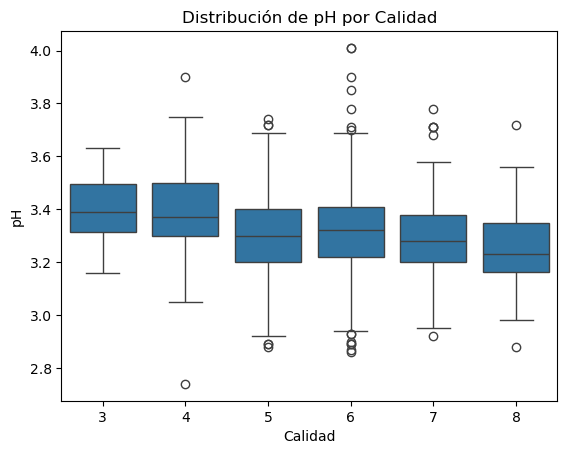

In [10]:
# Boxplot de la variable 'pH' por calidad
sns.boxplot(x='quality', y='pH', data=data)
plt.xlabel('Calidad')
plt.ylabel('pH')
plt.title('Distribución de pH por Calidad')
plt.show()

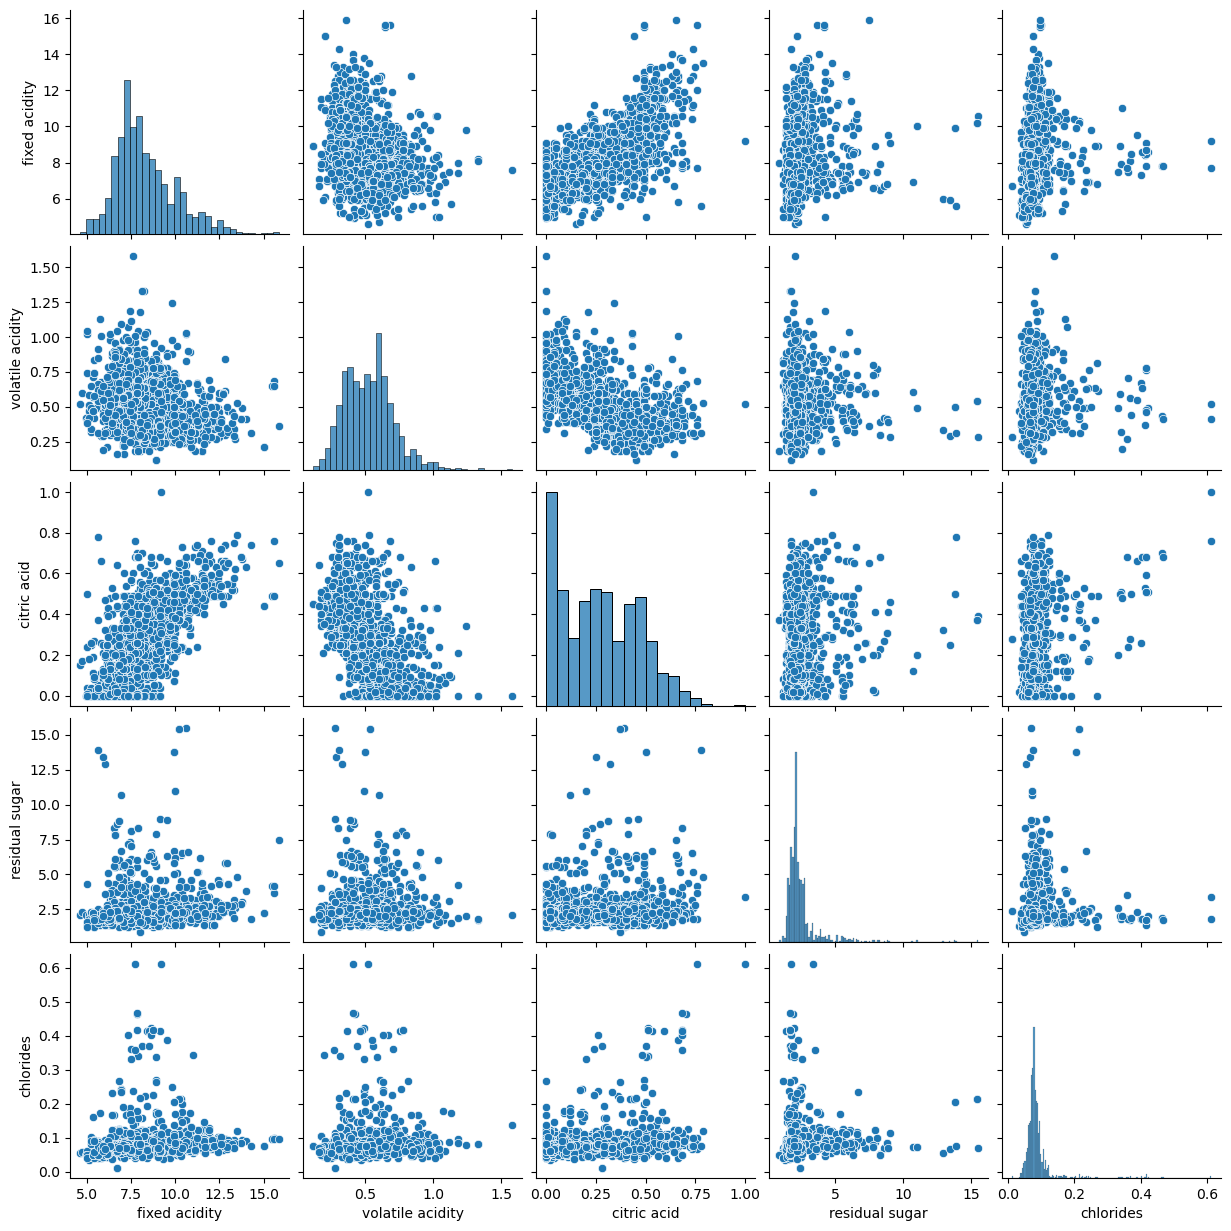

In [13]:
# Pairplot de las primeras 5 variables
sns.pairplot(data.iloc[:, :5])
plt.show()

In [ ]:
# Separar las características (X) y la variable objetivo (y)
X = data.drop(columns='quality')
y = data['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de árbol de decisión con ajuste de hiperparámetros
param_grid = {'max_depth': [3, 5, 7, 9], 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_

# Hacer predicciones
y_pred = best_model.predict(X_test)

# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [15]:
# Mostrar resultados
print(f"Mejores parámetros: {grid.best_params_}")
print(f"Precisión del modelo: {accuracy}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")


Mejores parámetros: {'criterion': 'gini', 'max_depth': 9}
Precisión del modelo: 0.5333333333333333
Matriz de confusión:
[[  0   0   1   0   0   0]
 [  0   0  12   4   1   0]
 [  1   8 120  61   5   0]
 [  1   2  64 114  19   0]
 [  0   2   2  34  22   1]
 [  0   0   0   4   2   0]]
Reporte de clasificación:


In [ ]:
# Crear un heatmap de la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()